In [139]:
import matplotlib.pyplot as plt
def print_terrain(terrain, visited):
    terrain = terrain + visited
    plt.matshow(terrain)
    plt.show(block=False)

In [158]:
import numpy as np
from IPython.display import clear_output

def bfs(terrain, location, target, a):
    queue = [(location, 0, terrain[location[0]][location[1]])]
    visited = np.zeros((len(terrain), len(terrain[0])))
    count = 0
    while(len(queue) > 0):
        if(count % 300 == 0):
            clear_output(wait=True)
            print_terrain(a, visited)
        count += 1
        if(count > 30000): break
        current = queue.pop(0)
        depth = current[1]
        current = current[0]
        if(visited[current[0]][current[1]]): continue
        if(terrain[current[0]][current[1]] == target): return (depth, visited)
        if(current[0] < len(terrain) - 1 and (terrain[current[0] + 1][current[1]] - terrain[current[0]][current[1]]) <= 1):
            queue.append(((current[0] + 1, current[1]), depth + 1, terrain[current[0] + 1][current[1]]))
        if(current[0] > 0 and (terrain[current[0] - 1][current[1]] - terrain[current[0]][current[1]]) <= 1):
            queue.append(((current[0] - 1, current[1]), depth + 1, terrain[current[0] - 1][current[1]]))
        if(current[1] < len(terrain[0]) - 1 and (terrain[current[0]][current[1] + 1] - terrain[current[0]][current[1]]) <= 1):
            queue.append(((current[0], current[1] + 1), depth + 1, terrain[current[0]][current[1] + 1]))
        if(current[1] > 0 and (terrain[current[0]][current[1] - 1] - terrain[current[0]][current[1]]) <= 1):
            queue.append(((current[0], current[1] - 1), depth + 1, terrain[current[0]][current[1] - 1]))
        visited[current[0]][current[1]] = 35
    return depth, visited

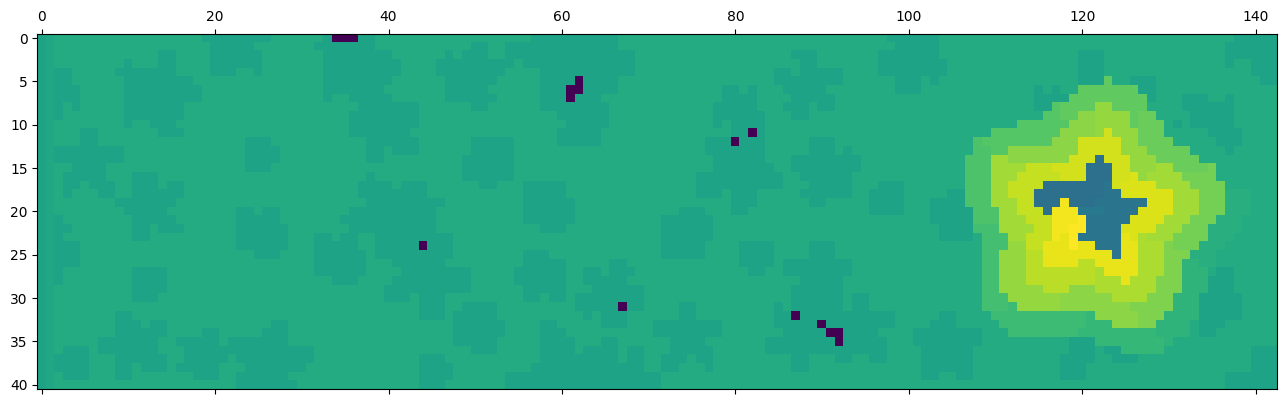

[[35. 35. 35. ... 35. 35. 35.]
 [35. 35. 35. ... 35. 35. 35.]
 [35. 35. 35. ... 35. 35. 35.]
 ...
 [35. 35. 35. ... 35. 35. 35.]
 [35. 35. 35. ... 35. 35. 35.]
 [35. 35. 35. ... 35. 35. 35.]]
462


In [147]:
# Read input from file
import numpy as np
with open('input.txt', 'r') as f:
    input = f.read()
input = input.split('\n')
start = [[(i,j) if x == 'S' else 0 for j,x in enumerate(y)] for i, y in enumerate(input)]
start = next(filter(lambda x: x, [item for sublist in start for item in sublist]))
print(start)
terrain = [[ord(i) - ord('a') + 1 if ord(i) - ord('a') + 1 > 0 else (1 if i == 'S' else 26) for i in y] for y in input]
# a 2D array with linearly increasing values on the diagonal
a = np.array(terrain)
depth, visited = bfs(terrain, start, 26, a)
print(visited)
print(depth)

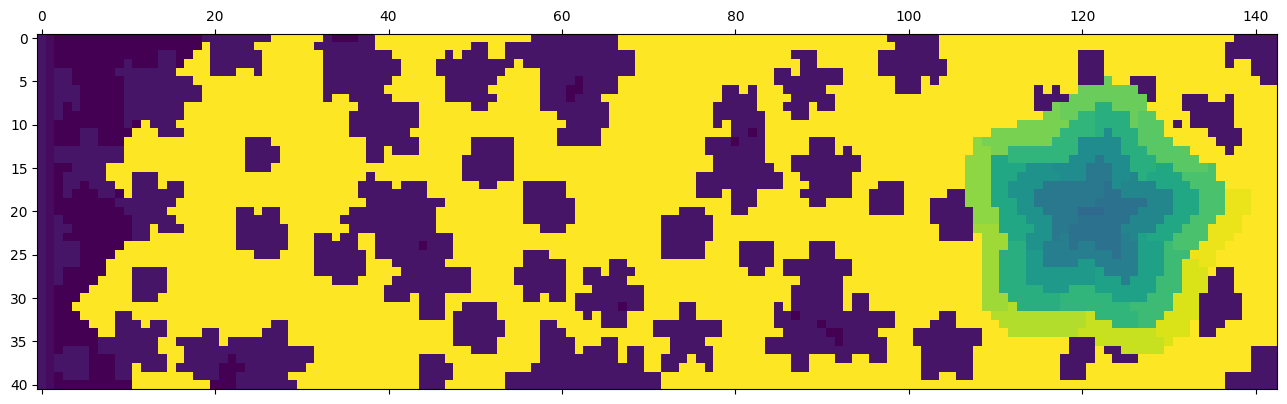

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
451


In [159]:
# Read input from file
import numpy as np
with open('input.txt', 'r') as f:
    input = f.read()
input = input.split('\n')
start = [[(i,j) if x == 'E' else 0 for j,x in enumerate(y)] for i, y in enumerate(input)]
start = next(filter(lambda x: x, [item for sublist in start for item in sublist]))
print(start)
terrain = [[27 - (ord(i) - ord('a') + 1) if (ord(i) - ord('a') + 1) > 0 else (1 if i == 'E' else 26) for i in y] for y in input]
# a 2D array with linearly increasing values on the diagonal
a = np.array(terrain)
depth, visited = bfs(terrain, start, 26, a)
print(visited)
print(depth)